In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
%matplotlib inline

In [ ]:
# Load MNIST digits data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(f'Size of X_train: {X_train.shape}')
print(f'Size of X_test: {X_test.shape}')

X_train_size = X_train.shape[0]
X_test_size = X_test.shape[0]
image_size = X_train.shape[1]
NUM_OF_CLASSES = 10

Size of X_train: (60000, 28, 28)
Size of X_test: (10000, 28, 28)


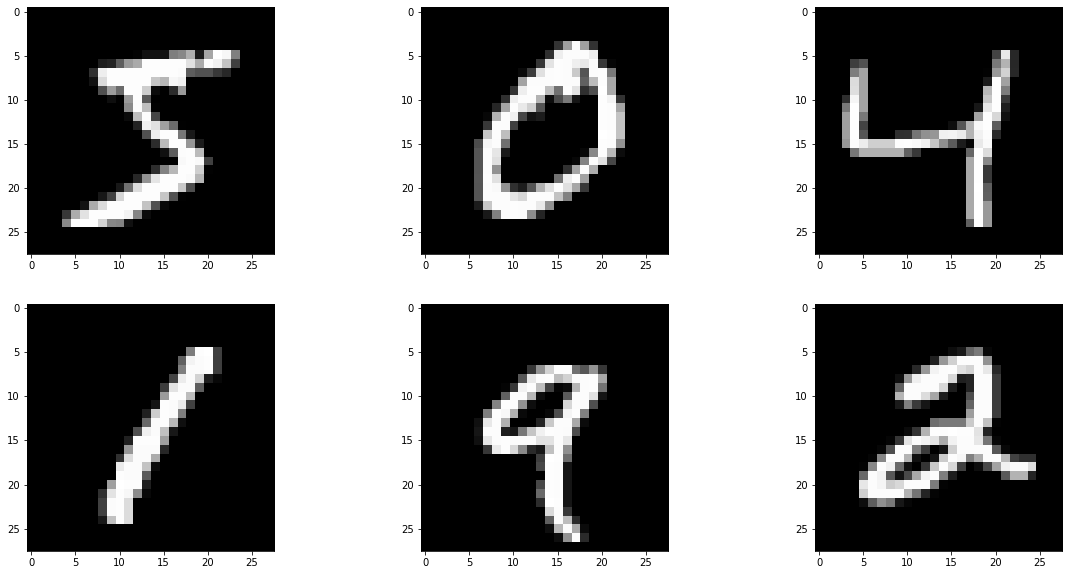

In [ ]:
# View data as image
rows, cols = (2, 3)
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
data = 0
for r in range(rows):
  for c in range(cols):
    ax[r, c].imshow(X_train[data], cmap=plt.get_cmap('gray'))
    data += 1

In [ ]:
# Data Preprocessing

# Reshape data
X_train_reshaped = X_train.reshape(X_train_size, image_size, image_size, 1)
X_test_reshaped = X_test.reshape(X_test_size, image_size, image_size, 1)

# Normalize inputs
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0  

# One hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [ ]:
# Build model

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(NUM_OF_CLASSES, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train_normalized, y_train_one_hot, validation_data=(X_test_normalized, y_test_one_hot), epochs=50, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 52s 866us/step - loss: 0.3419 - accuracy: 0.8924 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 2/50
60000/60000 [==============================] - 51s 858us/step - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.0408 - val_accuracy: 0.9861
Epoch 3/50
60000/60000 [==============================] - 51s 855us/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0372 - val_accuracy: 0.9878
Epoch 4/50
60000/60000 [==============================] - 51s 858us/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 5/50
60000/60000 [==============================] - 51s 855us/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0285 - val_accuracy: 0.9901
Epoch 6/50
60000/60000 [==============================] - 51s 851us/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 7/50
60000/60000 [==============================] 

In [ ]:
# Save model

model.save("model.h5")

In [ ]:
# Convert the model for Tensorflow.js

#!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'